In order to analyze the data, I will load the file weather.csv into a Pandas data frame.
I will perform the following tasks:

a. The temperatures recorded in the HI and LO columns are measured in
Fahrenheit. I will create a function that will convert Fahrenheit temperatures to Celsius temperatures. I will Use this function to create two new columns HI-C and LOC. Insert these columns in the data frame so that HI-C is adjacent to HI and LO-C is adjacent to LO. 


b. I will save the modified data frame to a pickle file in your home directory called
weather.pkl and I will discuss the advantage the pickle data file provides over saving a
data frame as a CSV file?


c. The amount of rain recorded in the PREC column is measured in inches. Append
a column to the data frame that represents the amount of rainfall in
centimeters. Remember to retain the T notation to indicate a trace of rain. Make
sure to show all code to append this column to the data frame.


d. Show what was the maximum low (LO) temperature during the month of July


e. Show what is the average amount of daily rainfall for the month of June

In [6]:
import pandas as pd

df = pd.read_csv('/public/bmort/python/weather.csv')

a) the temperatures...answer:

In [9]:
def f_to_c(f):
    return ((f-32)*(5/9))
df['HI-C'] = df['HI'].apply(f_to_c)
df['LO-C'] = df['LO'].apply(f_to_c)
df.insert(3,'HI-C',df.pop('HI-C'))
df.insert(5,'LO-C',df.pop('LO-C'))


b) answer: pickle preserves the complete state of the data frame, including data types and index labels which might be lost or need conversion when saving to and loading from a CSV file.
Also, loading dealing with pickle format is faster than CSV since it is specifically optimized for Python objects.
Finally, pickle files can sometimes be smaller than CSV files, which can help save space and reduce time cost as well.

In [12]:
import pickle
df.to_pickle('weather.pkl')
with open('weather.pkl', 'rb') as file:
    weather = pickle.load(file)

c)

In [14]:
def in_to_cm(inch):
    if inch == 'T':
        return 'T'
    else:
        return(float(inch)*2.54)

df['PREC-CM'] = df['PREC'].apply(in_to_cm)

d)What was the maximum low (LO) temperature during the month of July?
answer: 

74 F

23.33(recurring) C

e) 
What is the average amount of daily rainfall for the month of June?
answer: 
0.1554320987654321 inches
0.39479753086419755 cm

7. Using the mtcars data set (located at /public/bmort/python/mtcars.csv),
I will perform the following tasks and answer the questions below:


a. Using Scikit-Learn's LinearRegression(), construct a model to predict the
fuel efficiency of the set of cars (mpg) in the data set as a function of both the
horsepower (hp) of the engines and the weight (wt) of the cars.


b. Plot the data points in the data set and your linear model using Pyplot. I will
choose to make a 3D plot.


c. What is the predicted fuel efficiency of a car that has a horsepower of 130 and a
weight of 1.5 klbs

In [15]:
df = pd.read_csv('/public/bmort/python/mtcars.csv')

a) 

In [16]:
from sklearn.linear_model import LinearRegression
x = df[['hp','wt']]
y = df['mpg']
model = LinearRegression().fit(x,y)

b)

Text(0.5, 0, 'wt')

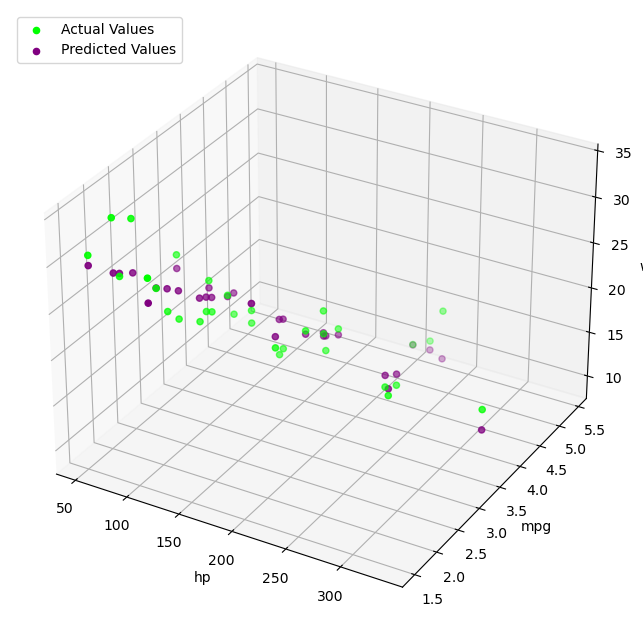

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y_predicted = model.predict(x)
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['hp'],df['wt'],df['mpg'],color='lime',label='Actual Values')
fg_predict = ax.scatter3D(df['hp'],df['wt'],y_predicted,color='purple',label='Predicted Values')

ax.legend(loc='upper left')

ax.set_xlabel('hp')
ax.set_ylabel('mpg')
ax.set_zlabel('wt')

c: What is the predicted fuel efficiency of a car that has a horsepower of 130 and a
weight of 1.5 klbs?

answer: 27.2800409